<img src="../img/K-ICT_logo.jpg" width=50%>
<br>
<div align='center'><font size=5><b>분석 인프라 활용 AI 교육</b></font></div>
<br>
<div align='center'><font size=3>인공지능 빅데이터 전문가 심화과정</font></div>
<br>
<div align='right'>강사 <a href="https://open.kakao.com/me/minsuksung">성민석</a></div>
<div align='right'>minsuksung@korea.ac.kr</div>

![](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png)

# 타이타닉 생존 여부 데이터를 통해서 알아보는 머신러닝 예제 (7)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#데이터-살펴보기" data-toc-modified-id="데이터-살펴보기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 살펴보기</a></span></li><li><span><a href="#데이터-전처리" data-toc-modified-id="데이터-전처리-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#Name" data-toc-modified-id="Name-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Name</a></span></li><li><span><a href="#Sex" data-toc-modified-id="Sex-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sex</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#Embarked" data-toc-modified-id="Embarked-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Embarked</a></span></li><li><span><a href="#Fare" data-toc-modified-id="Fare-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Fare</a></span></li><li><span><a href="#Cabin" data-toc-modified-id="Cabin-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Cabin</a></span></li></ul></li><li><span><a href="#피처-엔지니어링" data-toc-modified-id="피처-엔지니어링-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>피처 엔지니어링</a></span><ul class="toc-item"><li><span><a href="#FamilySize" data-toc-modified-id="FamilySize-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>FamilySize</a></span></li></ul></li><li><span><a href="#모델링" data-toc-modified-id="모델링-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>모델링</a></span></li><li><span><a href="#모델-평가" data-toc-modified-id="모델-평가-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>모델 평가</a></span></li><li><span><a href="#결과-예측" data-toc-modified-id="결과-예측-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>결과 예측</a></span></li></ul></div>

<div align='center'><font size=3 color='red'><b>주의</b>: </font><font size=3><b>구글 콜랩</b>이나 <b>아나콘다</b>를 통해서 주피터 노트북을 실행해주세요!</font></div>

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

## 데이터 불러오기
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

만약 데이터가 없다면 아래의 링크를 실행시켜주세요.
```bash
!wget https://gist.githubusercontent.com/minsuk-sung/89df85781237b7e5b2bcd34e2c17c7ee/raw/3c3ceffb81f396e85bb964d8c77b5c90b681106c/train.csv -P data/titanic
!wget https://gist.githubusercontent.com/minsuk-sung/89df85781237b7e5b2bcd34e2c17c7ee/raw/3c3ceffb81f396e85bb964d8c77b5c90b681106c/test.csv  -P data/titanic
```

In [2]:
os.listdir('../data/titanic/')

['train.csv', 'test.csv']

In [3]:
train = pd.read_csv('../data/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('../data/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 데이터 살펴보기
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

데이터와 관련해서 보다 자세한 사항을 확인하고 싶으시면 [여기](https://www.kaggle.com/c/titanic/data)를 들어가서 확인해주세요.

In [5]:
train.shape

(891, 12)

In [6]:
test.shape  # 왜 1개의 컬럼이 없을까요?

(418, 11)

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

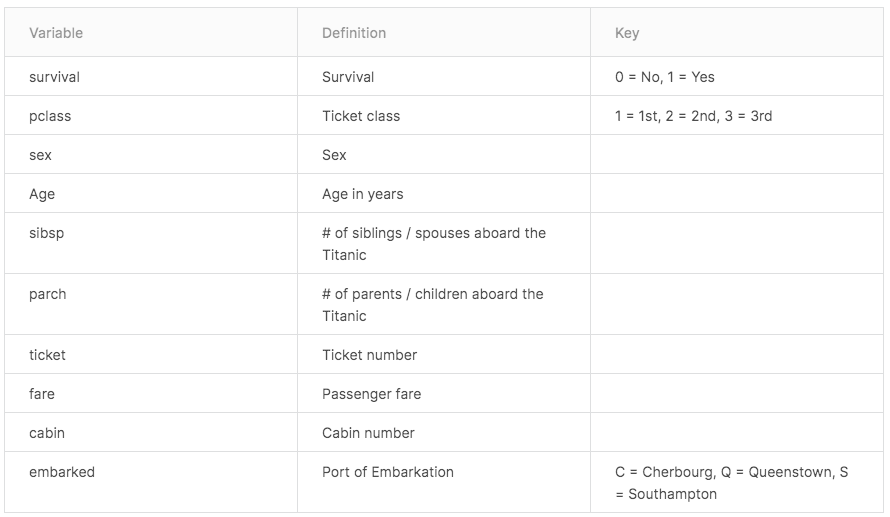

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train.isnull().sum() / train.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
test.isnull().sum() / test.shape[0] * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

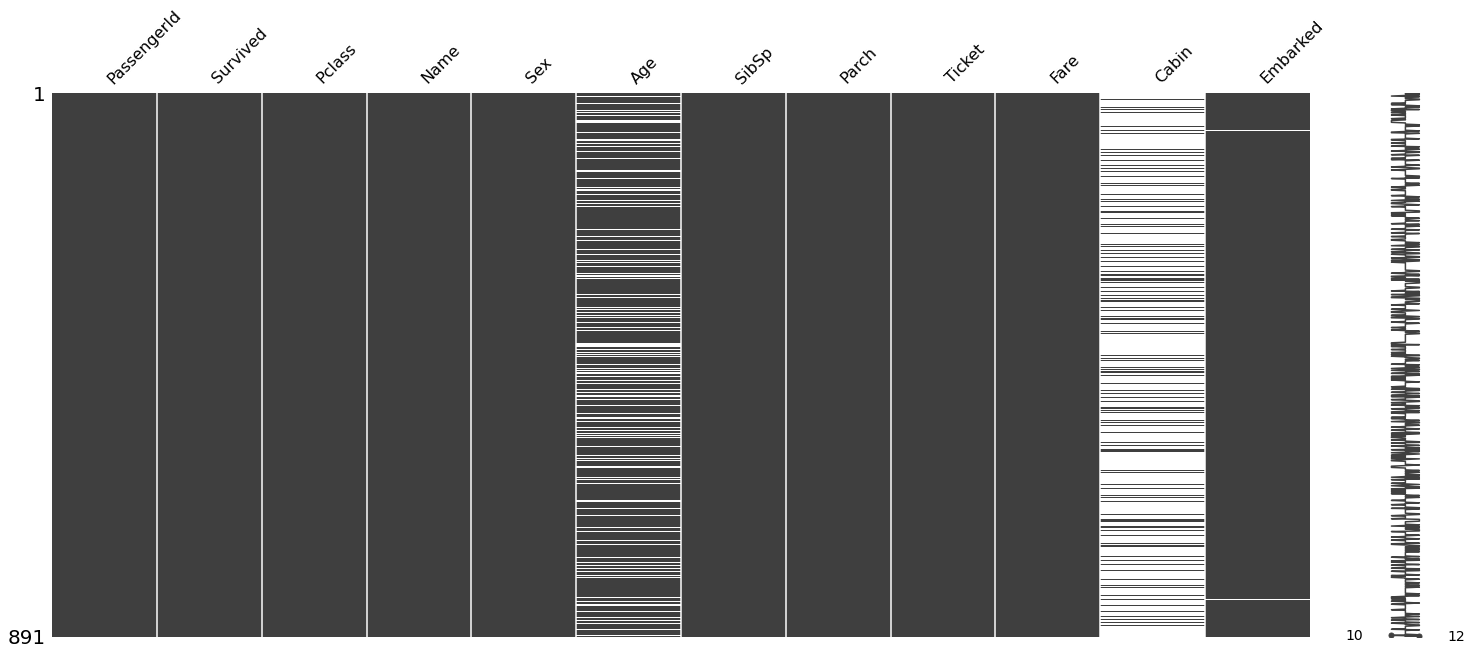

In [14]:
import missingno as msno
msno.matrix(train)
plt.show()

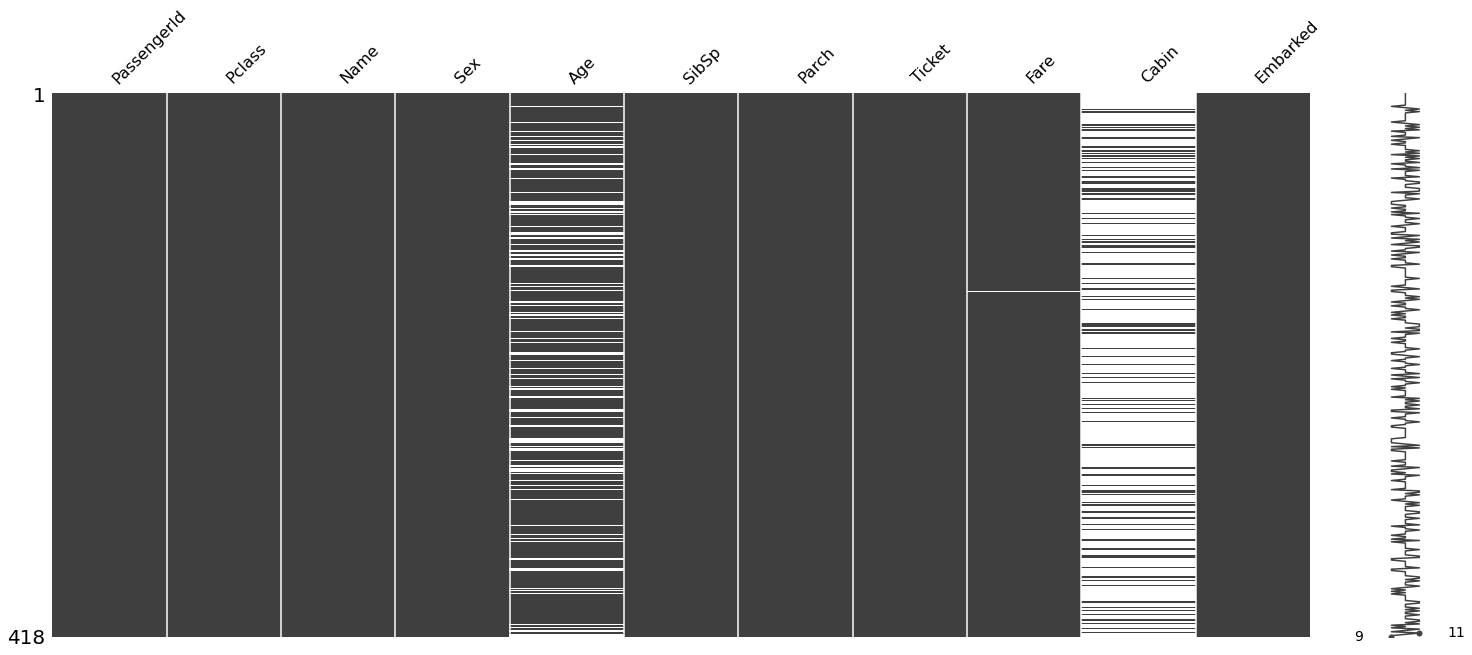

In [15]:
msno.matrix(test)  # Fare에도 결측치가...
plt.show()

In [16]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [17]:
test['Name'].head()

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object

## 데이터 전처리
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

### Name

In [20]:
total = [train, test]

In [21]:
for data in total:
    data['Title_from_name'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) # 정규표현식 이용

In [22]:
train['Title_from_name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Countess      1
Don           1
Ms            1
Capt          1
Sir           1
Mme           1
Jonkheer      1
Name: Title_from_name, dtype: int64

In [23]:
test['Title_from_name'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title_from_name, dtype: int64

In [24]:
pd.unique(pd.concat([train.Title_from_name,test.Title_from_name]))

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [25]:
pd.concat([train.Title_from_name,test.Title_from_name]).value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Don           1
Sir           1
Countess      1
Dona          1
Lady          1
Capt          1
Mme           1
Jonkheer      1
Name: Title_from_name, dtype: int64

In [26]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, 
                 "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }

In [27]:
for data in total:
    data['Title'] = data['Title_from_name'].map(title_mapping)

In [28]:
train.head() # Title 컬럼이 추가된 것을 확인하자

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [29]:
test.head() # Title 컬럼이 추가된 것을 확인하자

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2


### Sex

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(pd.concat([train.Sex,test.Sex]))

In [30]:
for data in total:
    data['Sex'] = le.transform(data['Sex'])

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2


### Age

In [33]:
train.Age.isnull().sum()

177

In [34]:
test.Age.isnull().sum()

86

In [35]:
# 기준을 Title로 하여 각 Title별 중앙값으로 대체하도록 하자
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [37]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2


### Embarked

In [38]:
train.Embarked.isnull().sum()

2

In [39]:
test.Embarked.isnull().sum()

0

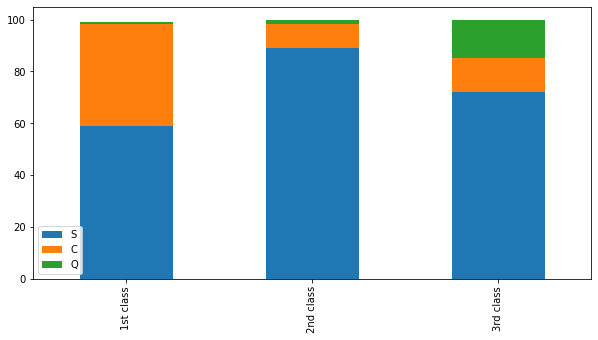

In [40]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts() / len(train[train['Pclass']==1]['Embarked']) * 100
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts() / len(train[train['Pclass']==2]['Embarked']) * 100
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts() / len(train[train['Pclass']==3]['Embarked']) * 100
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))
plt.show()

In [41]:
for data in total:
    data['Embarked'] = data['Embarked'].fillna('S')

In [42]:
le = LabelEncoder()
le.fit(pd.concat([train.Embarked, test.Embarked]))

LabelEncoder()

In [43]:
for data in total:
    data['Embarked'] = le.transform(data['Embarked'])

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,Mr,0


In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,Mr,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,Mrs,2


### Fare

In [46]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,Mr,0


In [48]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_from_name,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,Mr,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,Mrs,2


### Cabin

In [49]:
train.Cabin.isnull().sum()

687

In [50]:
test.Cabin.isnull().sum()

327

In [51]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
F33            3
              ..
C70            1
C90            1
D28            1
C82            1
F G63          1
Name: Cabin, Length: 147, dtype: int64

In [52]:
for data in total:
    data['Cabin'] = data['Cabin'].str[:1]

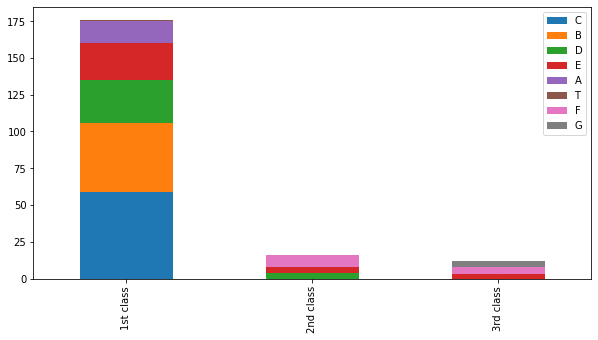

In [53]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))
plt.show()

## 피처 엔지니어링
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

### FamilySize

In [54]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    int64  
 5   Age              891 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         891 non-null    int64  
 12  Title_from_name  891 non-null    object 
 13  Title            891 non-null    int64  
 14  FamilySize       891 non-null    int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 104.5+ KB


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      418 non-null    int64  
 1   Pclass           418 non-null    int64  
 2   Name             418 non-null    object 
 3   Sex              418 non-null    int64  
 4   Age              418 non-null    float64
 5   SibSp            418 non-null    int64  
 6   Parch            418 non-null    int64  
 7   Ticket           418 non-null    object 
 8   Fare             418 non-null    float64
 9   Cabin            91 non-null     object 
 10  Embarked         418 non-null    int64  
 11  Title_from_name  418 non-null    object 
 12  Title            418 non-null    int64  
 13  FamilySize       418 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 45.8+ KB


## 모델링
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [67]:
selected_features = ['Pclass','Sex', 'Age', 'SibSp','Parch',
                     'Embarked','Title', 'Fare', 'FamilySize']

In [68]:
train[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Embarked    891 non-null    int64  
 6   Title       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [69]:
test[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Embarked    418 non-null    int64  
 6   Title       418 non-null    int64  
 7   Fare        418 non-null    float64
 8   FamilySize  418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train[selected_features],
                                                      train['Survived'],
                                                      test_size=0.2,
                                                      random_state=42)

In [71]:
from xgboost import XGBClassifier

In [72]:
model = XGBClassifier(random_state=0)

In [73]:
model.fit(X_train,y_train)

[16:04:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=20, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
model.score(X_valid,y_valid)

0.8547486033519553

In [87]:
from xgboost import plot_tree

In [88]:
# !pip install graphviz pydot pydotplus

In [89]:
# !sudo apt-get install graphviz

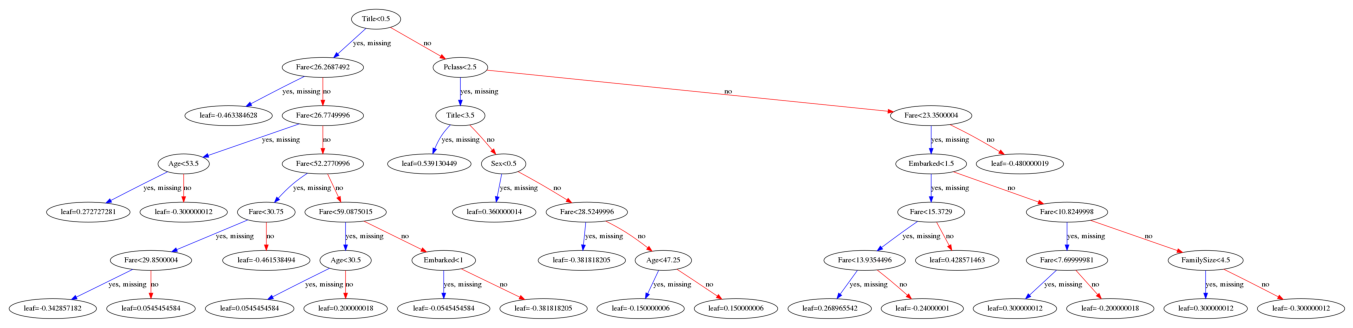

In [96]:
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(24,20)
plt.show()

## 모델 평가
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [97]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_valid)
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       105
           1       0.83      0.81      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179



## 결과 예측
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [99]:
y_test = model.predict(test[selected_features])
y_test

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [101]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_test
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [104]:
submission.to_csv('../data/titanic/submission.csv',index=False, encoding='utf8')

In [105]:
os.listdir('../data/titanic/')

['submission.csv', 'train.csv', 'test.csv']